In [47]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [48]:
dataset = './model/keypoint_classifier/keypoint.csv'
model_save_path = './model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = './model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [49]:
NUM_CLASSES = 28

# Dataset reading

In [50]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [51]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [54]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 42)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                860       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 28)                308       
                                                                 
Total params: 1378 (5.38 KB)
Trainable params: 1378 (5.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [56]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [57]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


1/6 [====>.........................] - ETA: 4s - loss: 3.3009 - accuracy: 0.0547
Epoch 1: saving model to ./model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 1s 46ms/step - loss: 3.2858 - accuracy: 0.0560 - val_loss: 3.2801 - val_accuracy: 0.0698
Epoch 2/1000
1/6 [====>.........................] - ETA: 0s - loss: 3.2480 - accuracy: 0.0859
Epoch 2: saving model to ./model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 11ms/step - loss: 3.2536 - accuracy: 0.0715 - val_loss: 3.2454 - val_accuracy: 0.0837
Epoch 3/1000
1/6 [====>.........................] - ETA: 0s - loss: 3.2261 - accuracy: 0.0703
Epoch 3: saving model to ./model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 3.2088 - accuracy: 0.0840 - val_loss: 3.2128 - val_accuracy: 0.0930
Epoch 4/1000
1/6 [====>.........................] - ETA: 0s - loss: 3.1780 - accuracy: 0.0938
Epoch 4: saving mod

c:\Users\krish\Documents\VS Code\Sixth Sem\env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 12ms/step - loss: 3.1669 - accuracy: 0.0995 - val_loss: 3.1823 - val_accuracy: 0.1256
Epoch 5/1000
1/6 [====>.........................] - ETA: 0s - loss: 3.1565 - accuracy: 0.1250
Epoch 5: saving model to ./model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 3.1399 - accuracy: 0.1104 - val_loss: 3.1466 - val_accuracy: 0.1488
Epoch 6/1000
1/6 [====>.........................] - ETA: 0s - loss: 3.1073 - accuracy: 0.1016
Epoch 6: saving model to ./model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 11ms/step - loss: 3.1018 - accuracy: 0.1260 - val_loss: 3.1086 - val_accuracy: 0.1535
Epoch 7/1000
1/6 [====>.........................] - ETA: 0s - loss: 3.1028 - accuracy: 0.0859
Epoch 7: saving model to ./model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 11ms/step - loss: 3.0631 - accuracy: 0.1213 - val_loss: 3.

In [58]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 7ms/step - loss: 0.7329 - accuracy: 0.7814


In [59]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [60]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 65ms/step
[9.8425131e-05 3.6295904e-03 3.1657971e-02 1.7146710e-02 2.1917092e-05
 7.3079593e-02 9.7055033e-02 3.9819879e-03 8.6761534e-02 3.0446823e-03
 6.7614174e-01 7.3801652e-03 1.9246167e-08 8.3349452e-09 4.2835222e-08
 4.6921240e-09 7.2495703e-09 2.0190866e-08 3.0849364e-07 6.2586366e-08
 1.9082156e-08 5.7328720e-08 1.6147802e-09 1.5559884e-08 4.4785886e-09
 3.4810512e-08 8.7718455e-09 7.2748905e-09]
10


# Confusion matrix

7/7 [==============================] - 0s 2ms/step


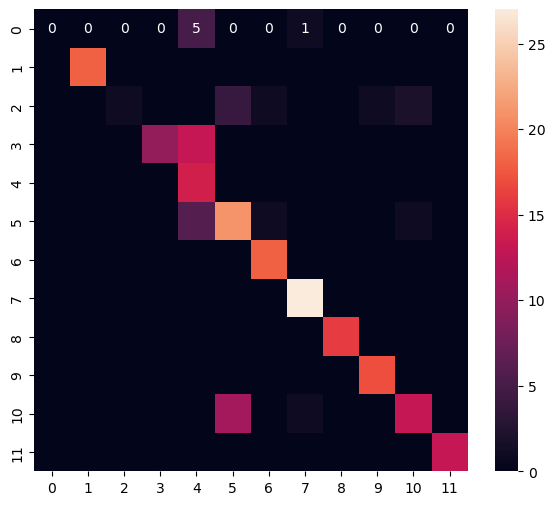

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      1.00      1.00        18
           2       1.00      0.11      0.20         9
           3       1.00      0.43      0.61        23
           4       0.37      1.00      0.54        14
           5       0.58      0.72      0.65        29
           6       0.90      1.00      0.95        18
           7       0.93      1.00      0.96        27
           8       1.00      1.00      1.00        16
           9       0.94      1.00      0.97        17
          10       0.81      0.52      0.63        25
          11       1.00      1.00      1.00        13

    accuracy                           0.78       215
   macro avg       0.79      0.73      0.71       215
weighted avg       0.83      0.78      0.76       215



c:\Users\krish\Documents\VS Code\Sixth Sem\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\krish\Documents\VS Code\Sixth Sem\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\krish\Documents\VS Code\Sixth Sem\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [62]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\Users\krish\Documents\VS Code\Sixth Sem\env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\krish\AppData\Local\Temp\tmp2mpx24y0\assets


INFO:tensorflow:Assets written to: C:\Users\krish\AppData\Local\Temp\tmp2mpx24y0\assets


7628

# Inference test

In [64]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [65]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [66]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [67]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 996 µs


In [68]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.8424971e-05 3.6295876e-03 3.1657968e-02 1.7146714e-02 2.1917098e-05
 7.3079593e-02 9.7054951e-02 3.9819870e-03 8.6761460e-02 3.0446800e-03
 6.7614192e-01 7.3801633e-03 1.9246171e-08 8.3349470e-09 4.2835236e-08
 4.6921165e-09 7.2495854e-09 2.0190869e-08 3.0849372e-07 6.2586260e-08
 1.9082160e-08 5.7328734e-08 1.6147805e-09 1.5559886e-08 4.4785811e-09
 3.4810519e-08 8.7718472e-09 7.2748780e-09]
10
